In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def split_numbers(item):
    TN,TP,FN,FP=list(map(int,item[1:-1].split(",")))
    return TN,TP,FN,FP

In [3]:
def calculate_metrics(TN,TP,FN,FP):
    if TP+FP==0:
        Pre=0
    else:
        Pre=TP/(TP+FP)
    Acc=(TP+TN)/10000
    Rec=TP/(TP+FN)
    if Pre+Rec==0:
        F1=0
    else:
        F1=2*((Pre*Rec)/(Pre+Rec))
    FPR=FP/(FP+TN)
    Sensitivity = TP / (TP + FN)      
    Specificity = TN / (TN + FP)
    Power=TP/1000
    return [Acc,Sensitivity,FPR,Power]

In [4]:
def get_metrics(df):
    metrics=[]
    for i in range(df.shape[0]):
        metrics.append([])
        for j in range(df.shape[1]):
            TN,TP,FN,FP=split_numbers(df.iloc[i,j])
            metrics[i].append(calculate_metrics(TN,TP,FN,FP))
            metrics_arr=np.array(metrics)
            
    return metrics_arr

In [5]:
scgco_df=pd.read_csv("scgco_numbers_noise.csv",index_col=0)
spatialde_df=pd.read_csv("spatialde_numbers_noise.csv",index_col=0)
spark_df=pd.read_csv("spark_numbers_noise.csv",index_col=0)
        
#scgco_arr=get_metrics(scgco_df)
scgco_arr=get_metrics(scgco_df)
spatialde_arr=get_metrics(spatialde_df)
spark_arr=get_metrics(spark_df)

scgco_y=scgco_arr.mean(axis=1)
scgco_yerr=scgco_arr.std(axis=1)

# scgco_y=scgco_arr.mean(axis=1)
# scgco_yerr=scgco_arr.std(axis=1)

spatialde_y=spatialde_arr.mean(axis=1)
spatialde_yerr=spatialde_arr.std(axis=1)

spark_y = spark_arr.mean(axis=1)
spark_yerr = spark_arr.std(axis=1)

trendsceek_y=np.zeros((6,4))
trendsceek_y[:,0]=0.9
trendsceek_yerr=np.zeros((6,4))

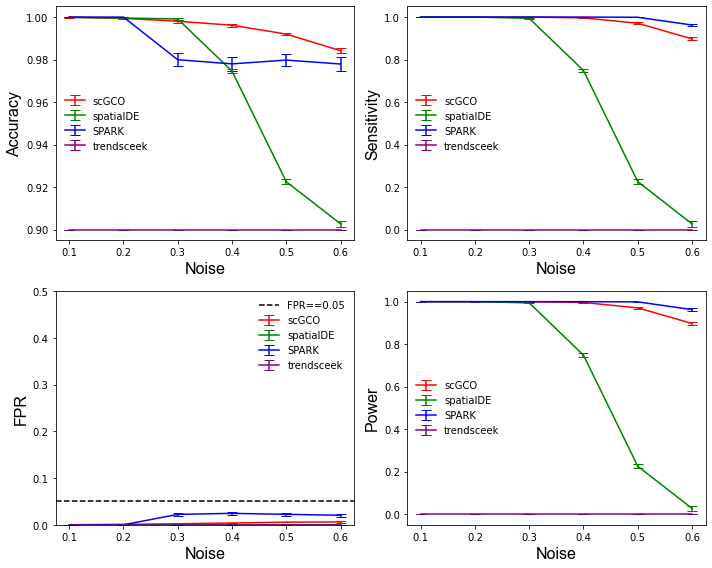

In [6]:
noise_arr=[0.1,0.2,0.3,0.4,0.5,0.6]
figure, axes = plt.subplots(2, 2, figsize=(10,8))
colors=['r',"g","b"] 
for i,metrics in enumerate("Accuracy,Sensitivity,FPR,Power".split(",")):
    x = int((i)/2)
    y= (i) % 2
    titleText = metrics

    ax = axes[x][y]
    ax.errorbar(noise_arr,scgco_y[:,i],yerr=scgco_yerr[:,i],color=colors[0],capsize=5,label="scGCO")
    
    
    ax.errorbar(noise_arr,spatialde_y[:,i],yerr=spatialde_yerr[:,i],color=colors[1],capsize=5,label="spatialDE")
    ax.errorbar(noise_arr,spark_y[:,i],yerr=spark_yerr[:,i],color=colors[2],capsize=5,label="SPARK")
    
    ax.errorbar(noise_arr,trendsceek_y[:,i],yerr=trendsceek_yerr[:,i],color="purple",capsize=5,label="trendsceek")
    
    ax.set_ylabel(metrics,fontname="Arial",fontsize=16)
    ax.set_xlabel("Noise",fontname="Arial",fontsize=16)
    ax.set_xticks(noise_arr)
    if i==2:
        ax.set_ylim(0,0.5)
        ax.axhline(0.05, ls='--', color='k',label="FPR==0.05")

    else:
        pass
    ax.legend(frameon=False)
figure.tight_layout()
figure.savefig("../../../../results/Figure/Supple_Fig1a-d_metrics_vs_noise.pdf",format="pdf",dpi=300)

In [8]:
sample_info=pd.read_csv("../processed_data/Rep11_MOB_info_scgco.csv",index_col=0)
tissue_mat=np.load("../processed_data/tissue_mat.npy")
tissue_mat=tissue_mat.astype("int")

In [9]:
locs=sample_info[["x","y"]].values

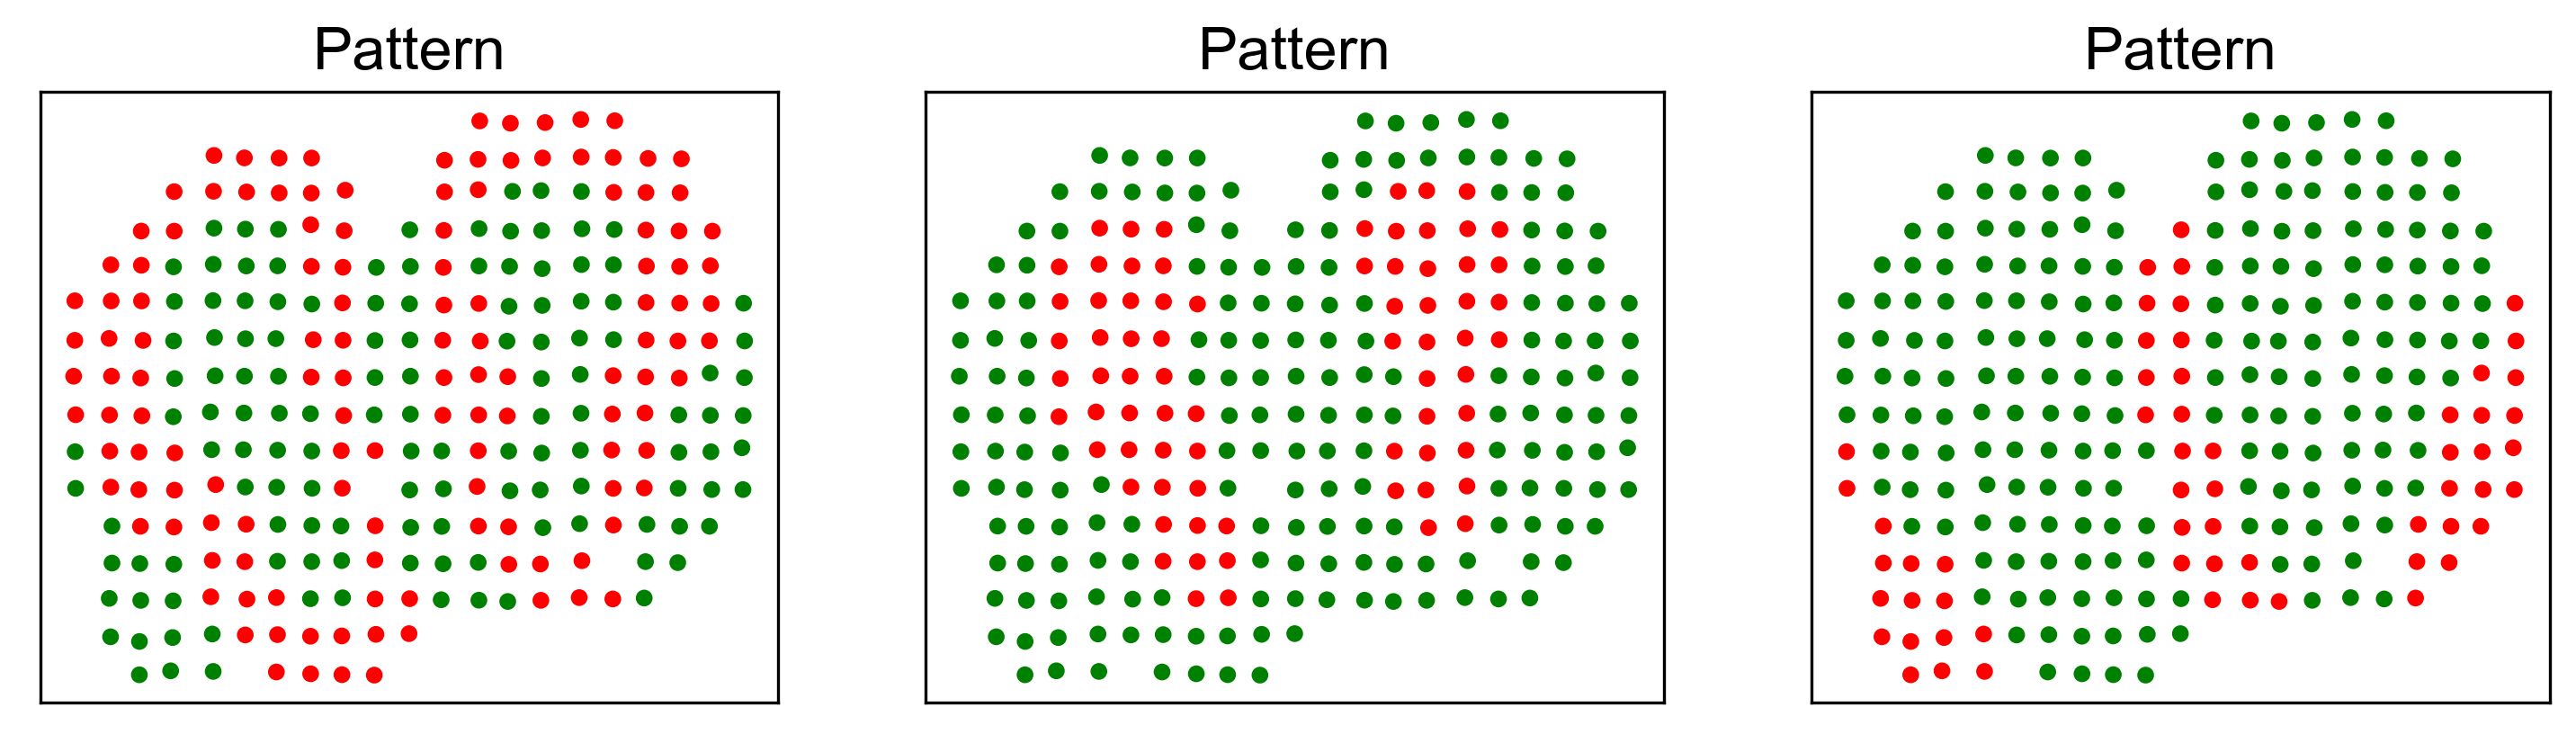

In [10]:
colors=["g","r"]
nrows=1
ncols=3
fig,ax=plt.subplots(nrows,ncols,figsize=(ncols*4,nrows*3),dpi=300)
for i in range (tissue_mat.shape[0]):
    ax[i].scatter(locs[:,0],locs[:,1],c=tissue_mat[i],cmap=matplotlib.colors.ListedColormap(colors),s=12)
    ax[i].set_title("Pattern",fontname="Arial",fontsize=16)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()
fig.savefig("../../../../results/Figure/Supple_Fig1e-Pattern.pdf",format="pdf",dpi=300)